<a href="https://colab.research.google.com/github/GuilhermeAzevedo2001/ControladorPI/blob/main/LugarDasRaizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 9.3 MB/s eta 0:00:00


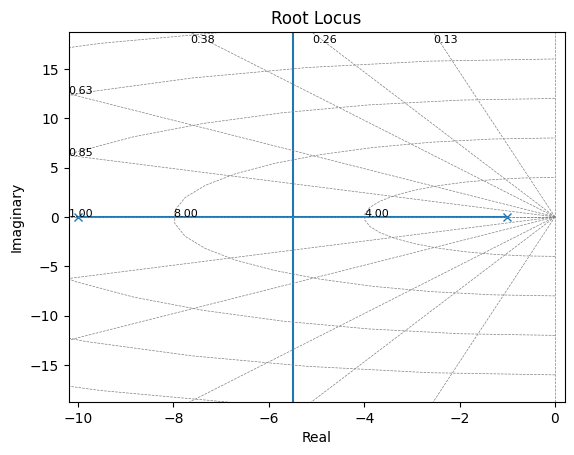

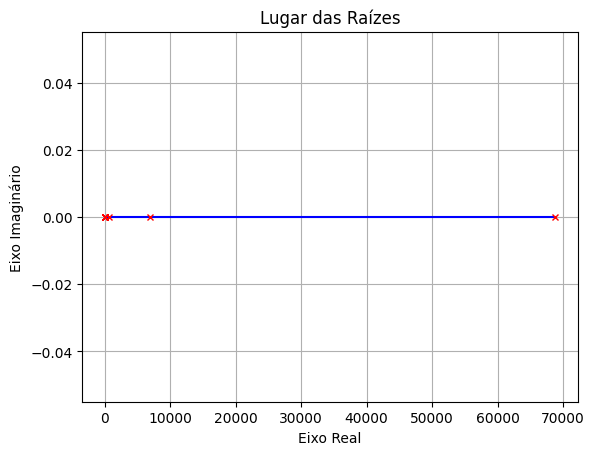

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

def plot_lugar_das_raizes(numerador, denominador):
    # Cria a função de transferência do sistema
    sistema = control.TransferFunction(numerador, denominador)

    # Calcula o lugar das raízes
    ganhos, raizes = control.root_locus(sistema)

    # Plota o lugar das raízes
    plt.figure()
    plt.title('Lugar das Raízes')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.grid(True)
    plt.plot(raizes.real, raizes.imag, 'b')
    plt.plot(raizes.real, raizes.imag, 'rx', markersize=5)
    plt.show()

# Exemplo de uso:
numerador = [5]
denominador = [1, 11, 10]

plot_lugar_das_raizes(numerador, denominador)


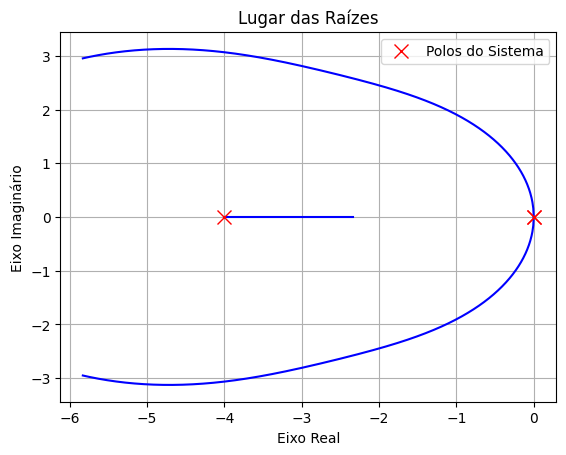

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctrl

def plot_lugar_das_raizes(G):
    # Calcula o lugar das raízes
    rlist, klist = ctrl.rlocus(G, kvect=np.linspace(0, 10, 1000), Plot=False)

    # Plota o lugar das raízes
    plt.figure()
    plt.title('Lugar das Raízes')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.grid(True)
    plt.plot(np.real(rlist), np.imag(rlist), 'b')

    # Plota os polos do sistema de malha fechada
    polos = ctrl.pole(G)
    plt.plot(np.real(polos), np.imag(polos), 'rx', markersize=10, label='Polos do Sistema')

    plt.legend()
    plt.show()

# Exemplo de uso:
num = [1, 7, 10]
den = [1, 4, 0, 0]
G = ctrl.tf(num, den)
plot_lugar_das_raizes(G)


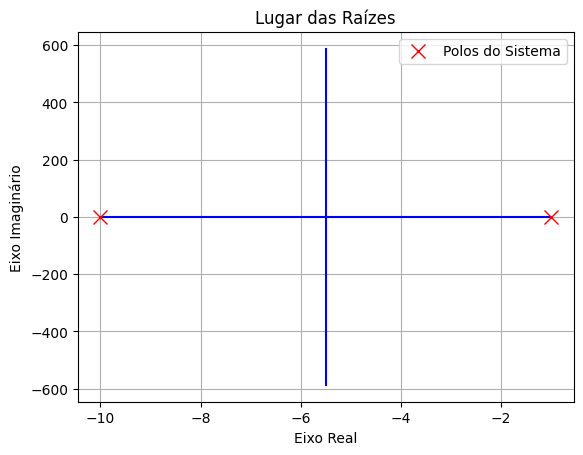

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctrl

def plot_lugar_das_raizes(G):
    # Calcula o lugar das raízes
    rlist, klist = ctrl.rlocus(G, Plot=False)

    # Plota o lugar das raízes
    plt.figure()
    plt.title('Lugar das Raízes')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.grid(True)
    plt.plot(np.real(rlist), np.imag(rlist), 'b')

    # Plota os polos do sistema de malha fechada
    polos = ctrl.pole(G)
    plt.plot(np.real(polos), np.imag(polos), 'rx', markersize=10, label='Polos do Sistema')

    plt.legend()
    plt.show()

# Exemplo de uso:
num = [5]
den = [1, 11, 10]
G = ctrl.tf(num, den)
K = 1  # Ganho
Gc = K * G  # Sistema de malha fechada
plot_lugar_das_raizes(Gc)


In [ ]:
import sympy as sp

def find_critical_gain(T):
    # Definir a variável 's' para a transformada de Laplace
    s = sp.Symbol('s')

    # Definir a função de transferência 'T(s)'
    Ts = T.subs(s, sp.I * 0)

    # Encontrar o ganho crítico
    Kc = sp.limit(Ts, sp.I * s, 0)

    return Kc

# Exemplo de uso
# Definir a função de transferência T(s)
s = sp.Symbol('s')
T = 2 / (s**2 + 3*s**12 +2)

# Encontrar o ganho crítico
Kc = find_critical_gain(T)
print("Ganho crítico (Kc):", Kc)


Ganho crítico (Kc): 1


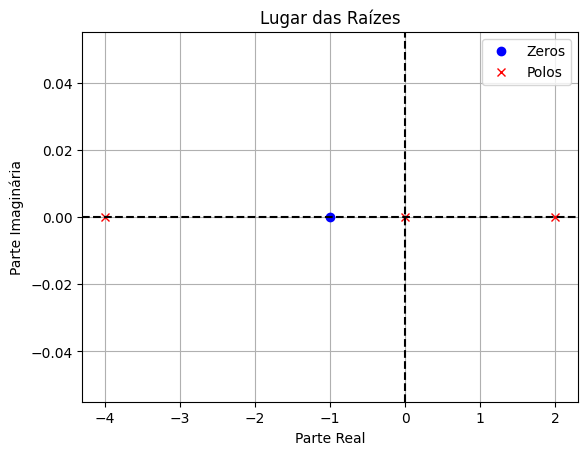

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lugar_das_raizes(numerador, denominador):
    # Calcula as raízes do numerador (zeros)
    zeros = np.roots(numerador)

    # Calcula as raízes do denominador (polos)
    polos = np.roots(denominador)

    # Plota o lugar das raízes
    plt.plot(np.real(zeros), np.imag(zeros), 'bo', label='Zeros')
    plt.plot(np.real(polos), np.imag(polos), 'rx', label='Polos')
    plt.axvline(x=0, color='k', linestyle='--')  # Eixo imaginário
    plt.axhline(y=0, color='k', linestyle='--')  # Eixo real
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Lugar das Raízes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de função de transferência T(s) = (s + 2) / (s^2 + 3s + 2)
numerador = [1, 1]
denominador = [2, 4, -16, 0]

# Chama a função para plotar o lugar das raízes
plot_lugar_das_raizes(numerador, denominador)


<ipython-input-27-30b760472fe9>:20: RuntimeWarning: divide by zero encountered in cdouble_scalars
  G = np.polyval(numerador, s) / np.polyval(denominador, s)
<ipython-input-27-30b760472fe9>:20: RuntimeWarning: invalid value encountered in cdouble_scalars
  G = np.polyval(numerador, s) / np.polyval(denominador, s)


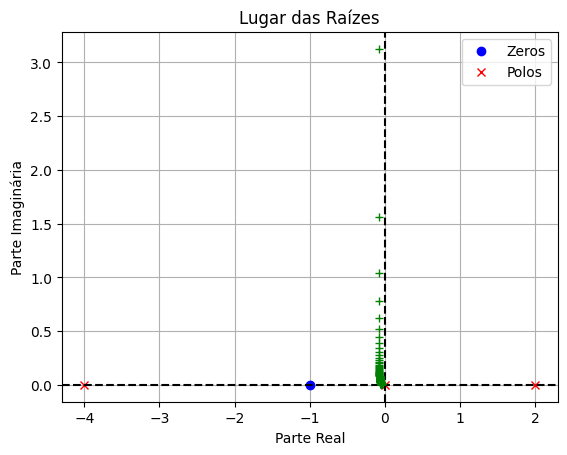

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lugar_das_raizes(numerador, denominador):
    # Calcula as raízes do numerador (zeros)
    zeros = np.roots(numerador)

    # Calcula as raízes do denominador (polos)
    polos = np.roots(denominador)

    # Plota o lugar das raízes
    plt.plot(np.real(zeros), np.imag(zeros), 'bo', label='Zeros')
    plt.plot(np.real(polos), np.imag(polos), 'rx', label='Polos')
    plt.axvline(x=0, color='k', linestyle='--')  # Eixo imaginário
    plt.axhline(y=0, color='k', linestyle='--')  # Eixo real

    # Traça as linhas do lugar das raízes
    for i in range(0, 100):
        s = complex(0, i / 50.0)
        G = np.polyval(numerador, s) / np.polyval(denominador, s)
        plt.plot(np.real(G), np.imag(G), 'g+')

    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Lugar das Raízes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de função de transferência T(s) = (s + 2) / (s^2 + 3s + 2)
numerador = [1, 1]
denominador = [2, 4, -16, 0]

# Chama a função para plotar o lugar das raízes
plot_lugar_das_raizes(numerador, denominador)


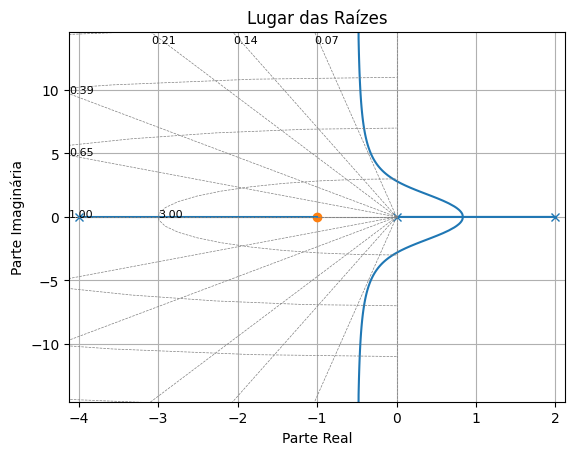

In [ ]:
import control
import matplotlib.pyplot as plt

def plot_lugar_das_raizes(numerador, denominador):
    # Cria a função de transferência a partir dos coeficientes
    G = control.TransferFunction(numerador, denominador)

    # Calcula e plota o lugar das raízes
    control.root_locus(G, Plot=True)

    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Lugar das Raízes')
    plt.grid(True)
    plt.show()

# Exemplo de função de transferência T(s) = (s + 2) / (s^2 + 3s + 2)
numerador = [1, 1]
denominador = [2, 4, -16, 0]

# Chama a função para plotar o lugar das raízes com os ramos
plot_lugar_das_raizes(numerador, denominador)


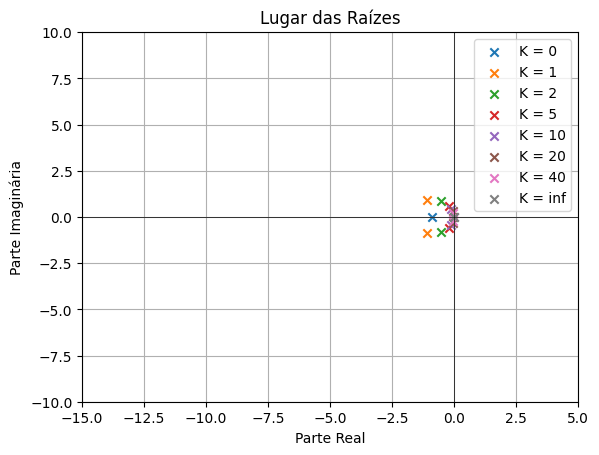

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

K_values = [0, 1, 2, 5, 10, 20, 40, np.inf]

for K in K_values:
    # Definir os coeficientes do polinômio
    num = [5 * K, 11, 10]
    den = [1, 0, 0]

    # Calcular as raízes do polinômio
    roots = np.roots(num)

    # Plotar as raízes no plano complexo
    plt.scatter(roots.real, roots.imag, marker='x', label=f'K = {K}')

# Configurar o gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Lugar das Raízes')
plt.legend()
plt.grid(True)
plt.xlim([-15, 5])
plt.ylim([-10, 10])

# Exibir o gráfico
plt.show()


K = 0: [-10.  -1.]
K = 1: [-10.  -1.]
K = 2: [-10.  -1.]
K = 5: [-10.  -1.]
K = 10: [-10.  -1.]
K = 20: [-10.  -1.]
K = 40: [-10.  -1.]
K = inf: [-10.  -1.]


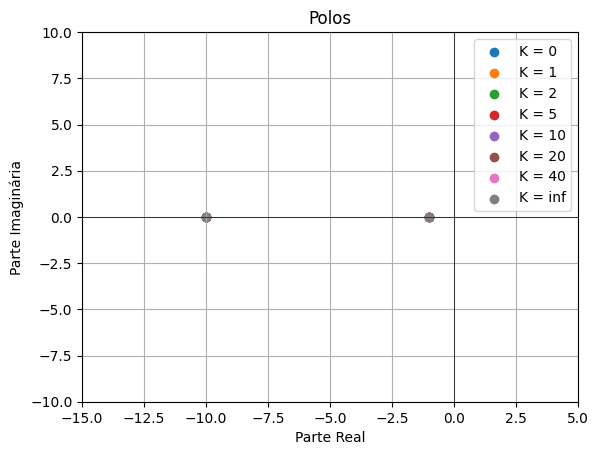

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

K_values = [0, 1, 2, 5, 10, 20, 40, np.inf]

for K in K_values:
    # Definir os coeficientes do polinômio
    num = [5 * K, 11, 10]
    den = [1, 11, 10]

    # Calcular os polos do polinômio
    poles = np.roots(den)
 # Imprimir os polos
    print(f"K = {K}: {poles}")
    # Plotar os polos no plano complexo
    plt.scatter(poles.real, poles.imag, marker='o', label=f'K = {K}')

# Configurar o gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Polos')
plt.legend()
plt.grid(True)
plt.xlim([-15, 5])
plt.ylim([-10, 10])

# Exibir o gráfico
plt.show()


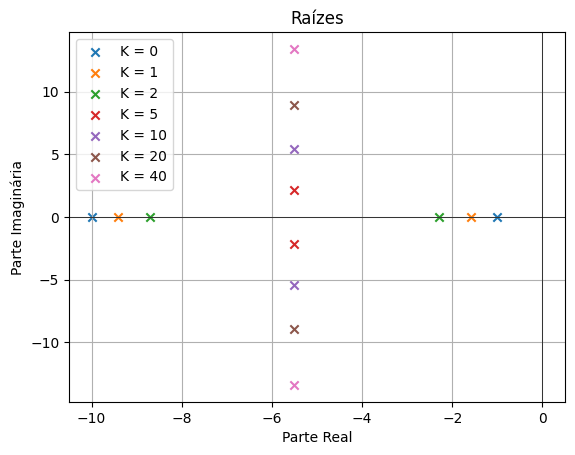

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

K_values = [0, 1, 2, 5, 10, 20, 40]

for K in K_values:
    # Definir os coeficientes do polinômio
    coef = [1, 11, 10 + 5 * K]

    # Calcular as raízes do polinômio
    roots = np.roots(coef)

    # Plotar as raízes no plano complexo
    plt.scatter(np.real(roots), np.imag(roots), marker='x', label=f'K = {K}')

# Configurar o gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Raízes')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


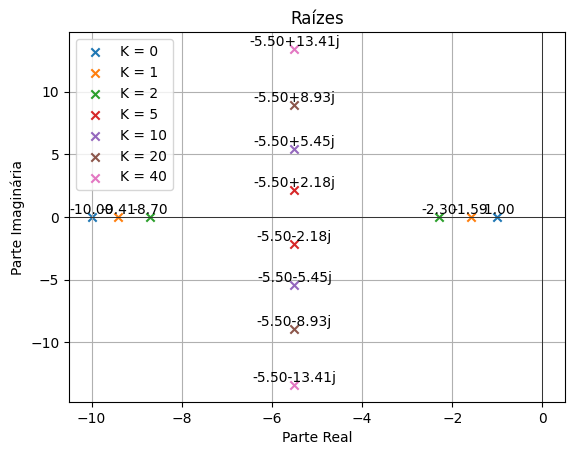

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

K_values = [0, 1, 2, 5, 10, 20, 40]

for K in K_values:
    # Definir os coeficientes do polinômio
    coef = [1, 11, 10 + 5 * K]

    # Calcular as raízes do polinômio
    roots = np.roots(coef)

    # Plotar as raízes no plano complexo
    plt.scatter(np.real(roots), np.imag(roots), marker='x', label=f'K = {K}')

    # Exibir os valores das raízes no gráfico
    for root in roots:
        plt.text(np.real(root), np.imag(root), f'{root:.2f}', ha='center', va='bottom')

# Configurar o gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Raízes')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
